# k-Nearest Neighbors

The k-NN algorithm is arguably the simplest machine learning algorithm. Building the model consists only of sorting the training dataset. To make predictions for a new data point, the algorithm finds the closets data points in the training dataset- its "nearest neighbors"

### k-Neighbors classfication
In its simplest version, the k-NN algorithm only considers exactly one nearest neighbors, which is the closest training data point to the point we want to make a prediction for. The prediction is then simply the known output for this training point

In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
cancer = load_breast_cancer()
print(" cancer.keys(): \n{}".format(cancer.keys()))

 cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [2]:
# The dataset consist of 569 data point, with 30 features
print("shape of cancer data: {}".format(cancer.data.shape))

shape of cancer data: (569, 30)


In [3]:
# Picking labels
print("Sample counts per class:\n{}".format(
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


To get a description of the semantic meaning of each feature, we can look at the feature_names attribute

In [4]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [5]:
# finfing more about the data by reading cancer.DESCR
print("Description:\n{}".format(cancer.DESCR))

Description:
Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radi

Using a real-worlld regression dataset.
Using the Boston Housing dataset to predict the median value of homes in several Boston neighborhoods in the 1970s, using information such as crime rate, proximity to Charles River, highway accessibility. This dataset contains 506 data points, described by 13 features 

In [6]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


In [7]:
print("Dataset description:\n {}".format(boston.DESCR))

Dataset description:
 Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teache

In [8]:
import mglearn
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


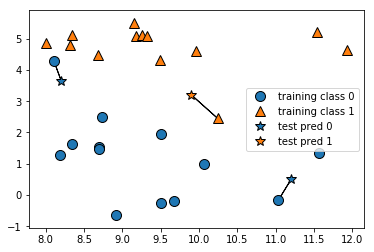

In [9]:
'''
Using k-Neigbors algorithm. The k-NN only considers exactly one nearest neighbor, which is the closest training data point to the pointwe want to make a prediction for. 
The predictions is then simply the known output for the training point. The figure below illustrates this for the case of classfiation on the forge dataset
'''
import matplotlib.pyplot as plt
mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.show()

I have added new data points, shown as the stars. For each of them, the k-NN marked the closest point on the training set.The prediction of the one-nearest-neighbor algorithm is label of that point(shown by the color of the cross)

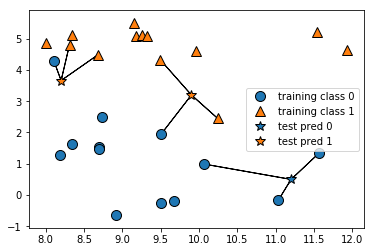

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.show()

Instead of considering only the closest neighbor,we can also consider an arbitary number, kof neighbors. This is where the name of the k-nearest neighbors algorithm comes from. When considering more than one neighbor, we use 'voting' to assign a label. This means that for each test point, we count how many neighbors belongs to class 0 and how many neighbors belong to class 1. We then assign the class thats is more frequent: in other  words, the majaority class among the k-nearest naighbors.

#### Applying k-nearest neighbors algorithm using scikit-learn
First we split data into training and a test set so we can evaluate generalization perdormance

In [11]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Import and instantiate the class. We set parameters, like the numbers of neighbors to use. Here we set it to 3.

In [12]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

Now, we fit the classfier using the training set. For KNeighborsClassfier this means storing the dataset, so we can compute neighbors during prediction

In [13]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

To make predictions on the test data, therefore call the 'predict' method. For each data point in the test set, this computes its nearestneighbors in the training set and finds the most common class among the:

In [14]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


To evaluat how well the model generalizes, call the score method with the test data together with the test  labels

In [15]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


#### Analyzing KneighborsClassfier
For two-dimensional datasets, we can also illustarte the prediction for all possible test points in the xy-plane. We color the plane according to the class that would be assigned to a point in this region.This lets us view te 'decision boundary', which is the divide between where the algorithm assigns class 0 versus where it assigns class 1. 

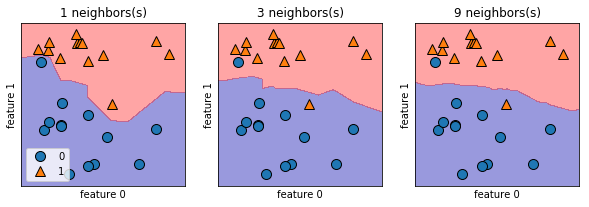

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbors(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    
axes[0].legend(loc=3)
plt.show()

##### Using Breast Cancer Dataset to confirm the connection between model complexity and generalization

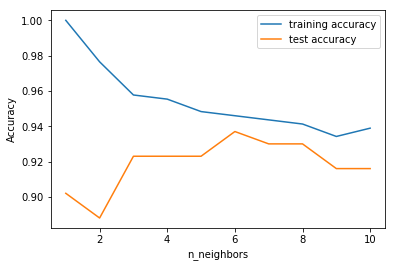

In [17]:
#  Splitting the dataset into training and test set
# Then evaluate training an test set performance with different numbers of neighbors
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model 
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record trainig set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()


The plot above shows the training and the test set accuracy on the y-axis against the setting of the n_neighbor on the x-axis.Because we are considerng a fewer neighbors corresponds to a more complex model, the plot is horizontally flipped. Considering a single nearest neighor, the prediction on the training set is perfect. But when more neighbors are considered, the model becomes simpler and the training accuracy drops. The test set accuracy for using a single neighhbor is lower than when using more neighbors, indicating that using the single nearest neighbor leads to a model that is too complex.
On the other hand, when considering 10 neighbors, the model is too simple and the performane is even worse. The best perfomance is somewhere in the middle, using around 6 neighbors.
Still, it is good to keep the scale of the plot in mind. The worst performance is around 88% accuracy, which might still be acceptable.

#### k-neighbors regression
There is also a regression variant of the k-nearest neighbors algorithm. I will start by using the single nearest neighbor, this time using the wave dataset. I have added three test data points as green stars on the x-axis.
The prediction using a single neigbor is just the target value of the nearest neighbor. They are shown in blue stars

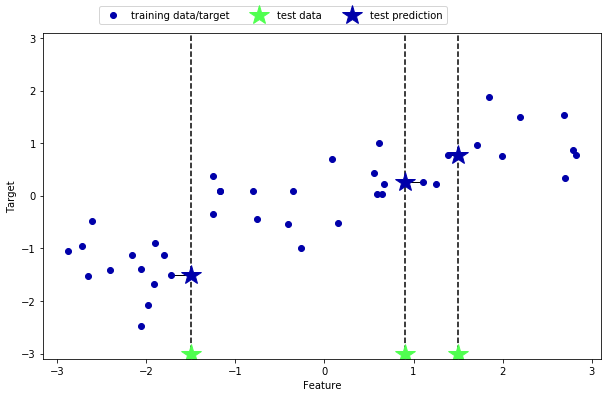

In [18]:
mglearn.plots.plot_knn_regression(n_neighbors=1)
plt.show()

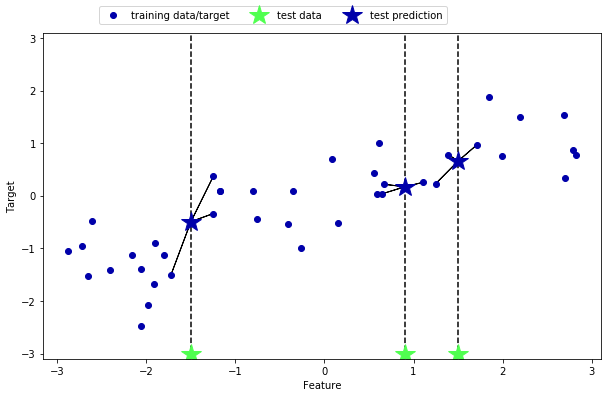

In [19]:
'''
using more than the single closest neighbor for regression.
When using multiple nearest neighors, the prediction is the average, or mean, of the relevant neighbors.
'''
mglearn.plots.plot_knn_regression(n_neighbors=3)
plt.show()

The k-nearest neighbors algorithm for regresion is implemented in the kNeighbors Regressor class in scikit-learn.
It's used similarly to kNeighborClassfier:

In [20]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave datasets into a training and test set
X_train, X_test, y_train, y_test = train_test_split(
X, y, random_state=0)

# Instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using traning data and training targets
reg.fit(X_train, y_train)

# make prediction on the test set
print('Test set predictions:\n{}'.format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


We can also evaluate the model using the *score* method, which for regressors returns the *R^2 score*.
The *R^2 score*, also known as the coefficient of determination, is a measure of goodness of a prediction for a regression model, and yields a score between 0 and 1.
A value of 1 corresponds to a perfect prediction, and a value of 0 corresponds to a constant model that just predicts the mean of the training set responses, y_train

In [21]:
print(' Test set R^2: {:.2f}'.format(reg.score(X_test, y_test)))

 Test set R^2: 0.83


### Analyzing KNeighborsRegressor

For one-dimensional dataset,we can see what the predictions look like for all possible features. Thus create a test dataset consisting of many points

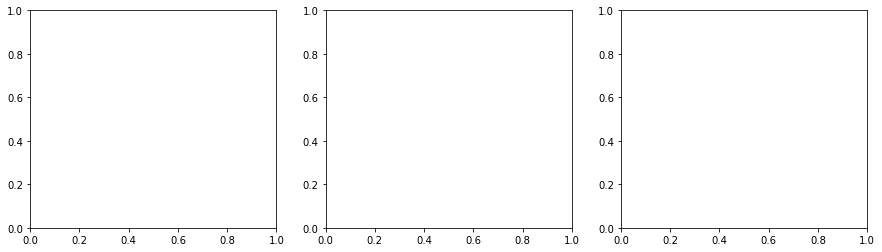

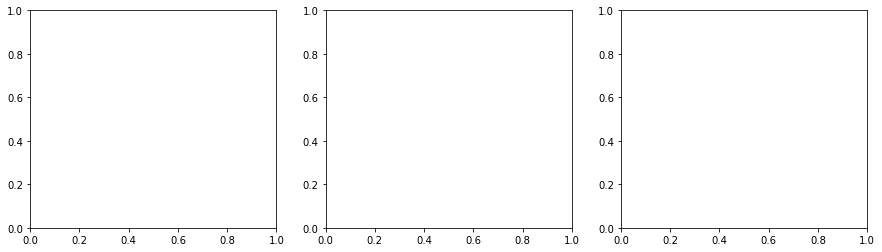

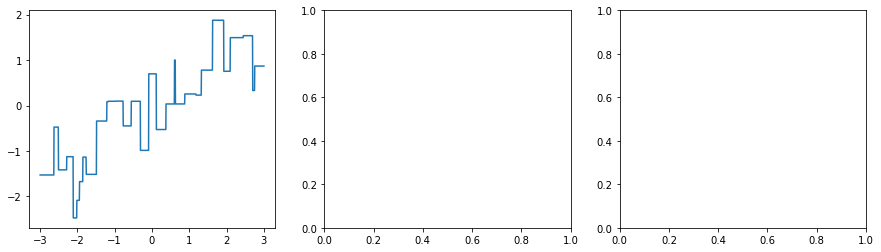

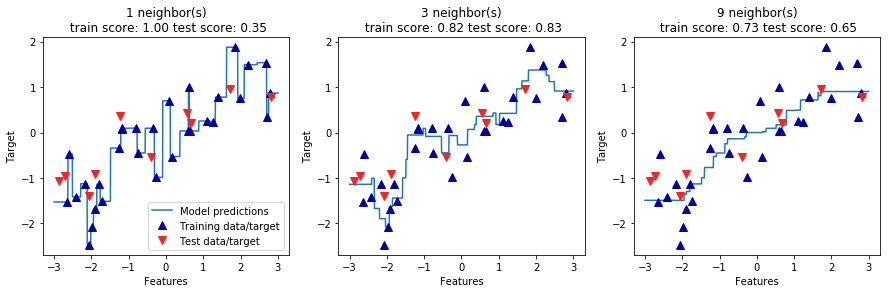

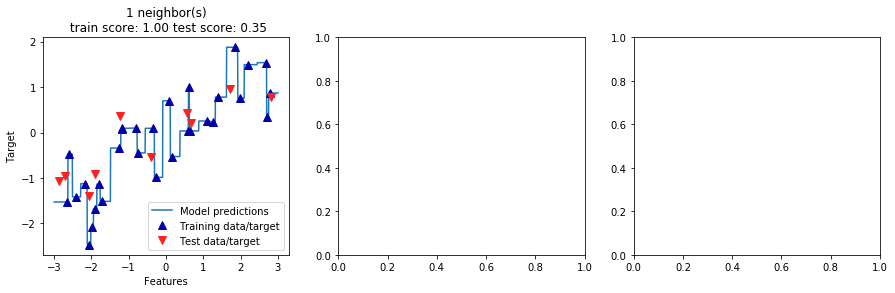

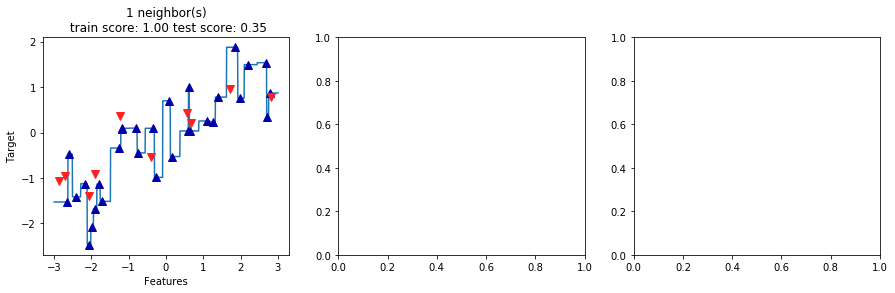

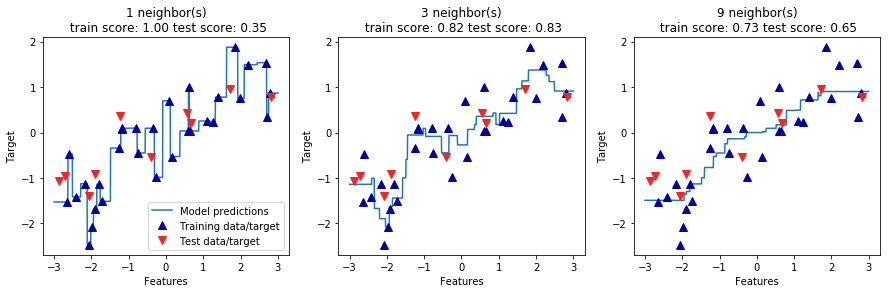

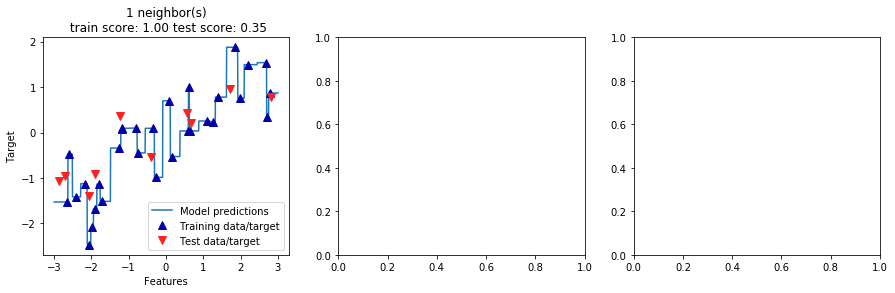

In [31]:
fig, axes = plt.subplots(1,3, figsize=(15,4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
    "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
    n_neighbors, reg.score(X_train, y_train),
    reg.score(X_test, y_test)))
    ax.set_xlabel('Features')
    ax.set_ylabel('Target')
    axes[0].legend(['Model predictions', 'Training data/target',
                   'Test data/target'], loc='best')
    plt.show()